<a href="https://colab.research.google.com/github/BikramKC7/Data-Visualization/blob/main/Global_Data_on_Sustainable_Energy_(2000_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/nepal_energy_data_with_household_id.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
# prompt: dataset info and description
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Household_ID            3000 non-null   object 
 1   Energy_Consumption_kWh  2967 non-null   float64
 2   Household_Size          3000 non-null   int64  
 3   Avg_Temperature_C       3000 non-null   float64
 4   Has_AC                  3000 non-null   object 
 5   Peak_Hours_Usage_kWh    2969 non-null   float64
 6   Location                3000 non-null   object 
 7   Has_Fan                 3000 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 187.6+ KB
None


In [ ]:
print(df.describe())

       Energy_Consumption_kWh  Household_Size  Avg_Temperature_C  \
count             2967.000000     3000.000000        3000.000000   
mean                10.627732        3.905333          24.729100   
std                  9.367207        2.105829           4.357693   
min                  0.570000        1.000000          14.500000   
25%                  4.535000        2.000000          20.700000   
50%                  8.160000        4.000000          25.900000   
75%                 13.570000        5.000000          28.300000   
max                136.470000       10.000000          35.400000   

       Peak_Hours_Usage_kWh  
count           2969.000000  
mean               4.365941  
std                3.778451  
min                0.210000  
25%                1.860000  
50%                3.310000  
75%                5.710000  
max               45.720000  


In [ ]:
df.head()

,Household_ID,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Location,Has_Fan
0,HH_00001,3.37,3,17.2,No,1.28,Pokhara,No
1,HH_00002,NaN,8,19.6,No,7.68,Lalitpur,No
2,HH_00003,6.78,5,19.6,Yes,2.55,Hetauda,No
3,HH_00004,15.02,4,29.6,Yes,6.43,Birgunj,Yes
4,HH_00005,2.06,2,21.3,Yes,0.68,Hetauda,Yes


In [ ]:
# prompt: check the number of null values in each column
print(df.isnull().sum())

Household_ID               0
Energy_Consumption_kWh    33
Household_Size             0
Avg_Temperature_C          0
Has_AC                     0
Peak_Hours_Usage_kWh      31
Location                   0
Has_Fan                    0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
# prompt: check the number of null values in each column
print(df.isnull().sum())

Household_ID              0
Energy_Consumption_kWh    0
Household_Size            0
Avg_Temperature_C         0
Has_AC                    0
Peak_Hours_Usage_kWh      0
Location                  0
Has_Fan                   0
dtype: int64


In [ ]:
# DEBUGGING: Check what values are actually in Has_AC before mapping
print("Unique values in Has_AC before mapping:")
print(df['Has_AC'].unique())
print("\nValue counts:")

Unique values in Has_AC before mapping:
['No' 'Yes']

Value counts:


In [ ]:
# Now map with error handling
df['Has_AC'] = df['Has_AC'].map({'Yes': 1, 'No': 0})
df['Has_Fan'] = df['Has_Fan'].str.strip().str.title().map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,Household_ID,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Location,Has_Fan
0,HH_00001,3.37,3,17.2,0,1.28,Pokhara,0
2,HH_00003,6.78,5,19.6,1,2.55,Hetauda,0
3,HH_00004,15.02,4,29.6,1,6.43,Birgunj,1
4,HH_00005,2.06,2,21.3,1,0.68,Hetauda,1
5,HH_00006,1.02,2,26.0,0,0.51,Dharan,1


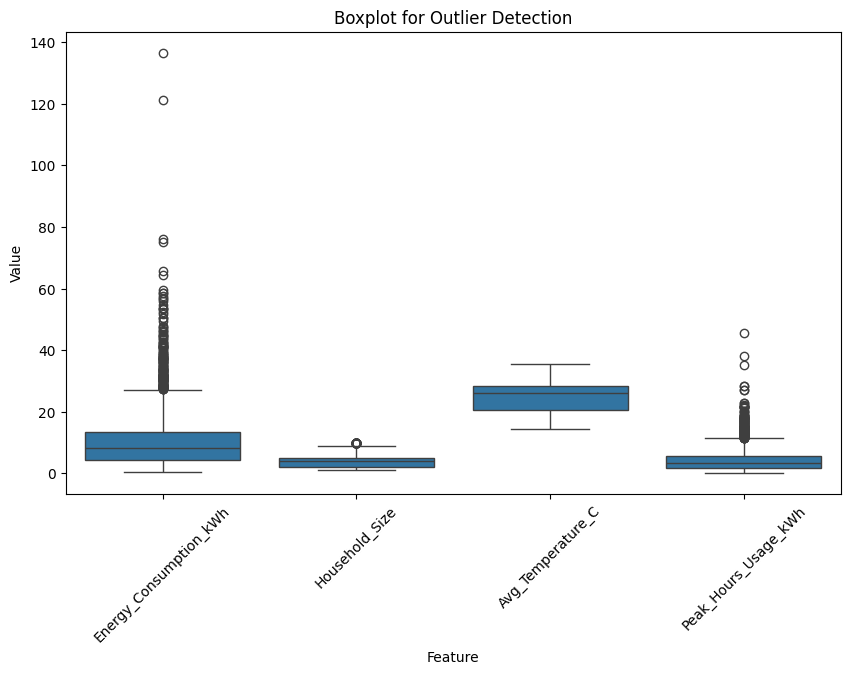

In [ ]:
# Outliers Detection and Treatmen
# Reshape the DataFrame to long format
df_melted = df[['Energy_Consumption_kWh','Household_Size','Avg_Temperature_C','Peak_Hours_Usage_kWh']].melt(var_name='Feature', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def analyze_and_cap_outliers(df, inplace=True):
    columns = ['Energy_Consumption_kWh', 'Household_Size', 'Avg_Temperature_C', 'Peak_Hours_Usage_kWh']

    print("OUTLIER ANALYSIS RESULTS:")
    print("="*60)

    # Analyze each column
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"\n{col}:")
        print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"  Outlier boundaries: < {lower_bound:.2f} or > {upper_bound:.2f}")
        print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

        if len(outliers) > 0:
            outlier_values = df.loc[outliers.index, col].sort_values()
            print(f"  Outlier values: {outlier_values.tolist()}")

    # Apply capping treatment
    print("\n" + "="*60)
    print("APPLYING CAPPING TREATMENT:")
    print("="*60)

    # Work on original or copy
    df_target = df if inplace else df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        df_target[col] = df_target[col].clip(lower=lower_bound, upper=upper_bound)
        after_outliers = len(df_target[(df_target[col] < lower_bound) | (df_target[col] > upper_bound)])

        print(f"\n{col}:")
        print(f"  Before capping: {before_outliers} outliers")
        print(f"  After capping: {after_outliers} outliers")
        print(f"  Capping range: {lower_bound:.2f} to {upper_bound:.2f}")

        if before_outliers > 0:
            high_values = df[df[col] > upper_bound][col]
            low_values = df[df[col] < lower_bound][col]
            if len(high_values) > 0:
                print(f"  High values capped from {high_values.max():.2f} to {upper_bound:.2f}")
            if len(low_values) > 0:
                print(f"  Low values capped from {low_values.min():.2f} to {lower_bound:.2f}")

    if inplace:
        return df
    else:
        return df_target
analyze_and_cap_outliers(df, inplace=True)

OUTLIER ANALYSIS RESULTS:

Energy_Consumption_kWh:
  Q1: 4.53, Q3: 13.61, IQR: 9.08
  Outlier boundaries: < -9.09 or > 27.23
  Number of outliers: 158 (5.4%)
  Outlier values: [27.44, 27.45, 27.5, 27.5, 27.67, 27.73, 27.83, 27.84, 27.9, 27.97, 28.02, 28.05, 28.08, 28.1, 28.16, 28.21, 28.23, 28.27, 28.46, 28.49, 28.56, 28.58, 28.58, 28.66, 28.85, 28.94, 29.23, 29.31, 29.41, 29.56, 29.88, 29.88, 29.91, 30.2, 30.21, 30.26, 30.33, 30.35, 30.43, 30.58, 30.64, 30.69, 30.9, 30.96, 31.04, 31.05, 31.29, 31.3, 31.36, 31.43, 31.53, 31.65, 31.67, 31.68, 31.71, 31.76, 31.8, 31.9, 31.96, 31.99, 32.06, 32.07, 32.25, 32.6, 32.72, 32.77, 32.96, 33.09, 33.11, 33.15, 33.64, 33.67, 33.71, 33.74, 33.88, 33.95, 34.06, 34.35, 34.42, 34.92, 34.97, 35.13, 35.34, 35.77, 36.0, 36.06, 36.14, 36.25, 36.47, 36.66, 36.76, 37.03, 37.12, 37.19, 37.26, 37.45, 37.54, 37.59, 37.71, 37.75, 37.88, 38.09, 38.28, 38.29, 38.43, 39.1, 39.18, 39.18, 39.72, 40.08, 40.59, 40.86, 41.08, 41.08, 41.1, 41.26, 41.48, 41.68, 41.71, 41.

,Household_ID,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Location,Has_Fan
0,HH_00001,3.37,3.0,17.2,0,1.28,Pokhara,0
2,HH_00003,6.78,5.0,19.6,1,2.55,Hetauda,0
3,HH_00004,15.02,4.0,29.6,1,6.43,Birgunj,1
4,HH_00005,2.06,2.0,21.3,1,0.68,Hetauda,1
5,HH_00006,1.02,2.0,26.0,0,0.51,Dharan,1
...,...,...,...,...,...,...,...,...
2995,HH_02996,7.39,6.0,28.1,0,2.29,Itahari,0
2996,HH_02997,5.78,2.0,19.7,0,2.13,Kathmandu,0
2997,HH_02998,11.39,3.0,26.9,1,3.47,Itahari,1
2998,HH_02999,8.58,3.0,31.2,0,3.04,Butwal,1


In [ ]:
df.describe()

,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Has_Fan
count,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,10.032790,3.891178,24.764067,0.240463,4.137408,0.699932
std,7.063761,2.080737,4.353556,0.427438,2.948426,0.458365
min,0.570000,1.000000,14.500000,0.000000,0.210000,0.000000
25%,4.530000,2.000000,20.700000,0.000000,1.860000,0.000000
50%,8.175000,4.000000,26.000000,0.000000,3.310000,1.000000
75%,13.610000,5.000000,28.300000,0.000000,5.700000,1.000000
max,27.230000,9.500000,35.400000,1.000000,11.460000,1.000000


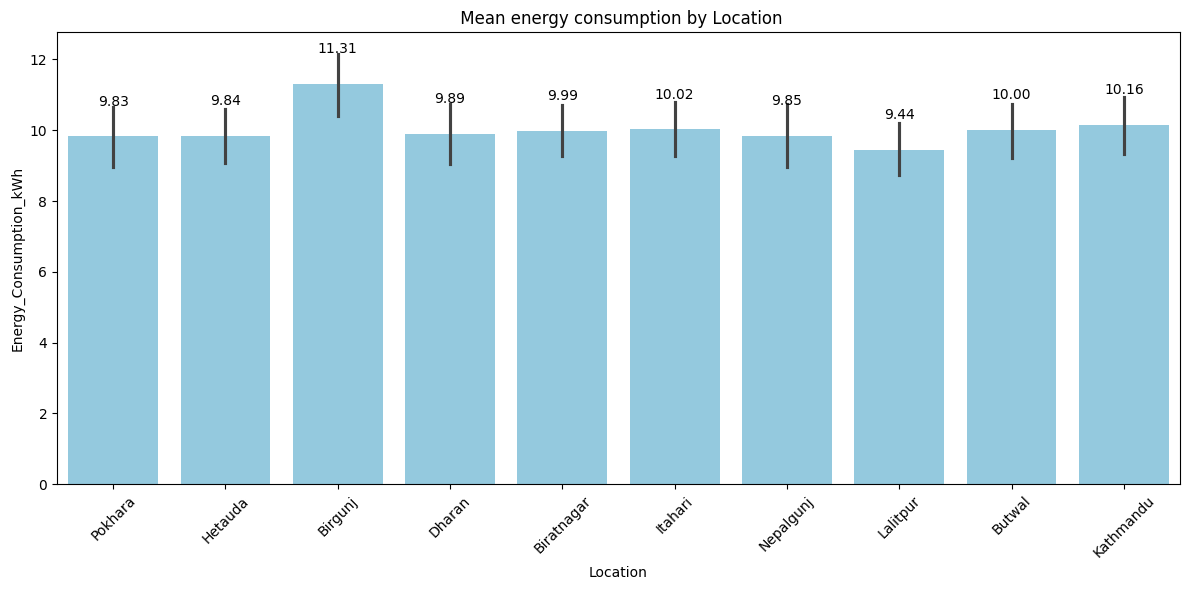

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Location', y='Energy_Consumption_kWh', data=df, color='skyblue')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=20)

plt.title(' Mean energy consumption by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Has_Fan
count,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,10.032790,3.891178,24.764067,0.240463,4.137408,0.699932
std,7.063761,2.080737,4.353556,0.427438,2.948426,0.458365
min,0.570000,1.000000,14.500000,0.000000,0.210000,0.000000
25%,4.530000,2.000000,20.700000,0.000000,1.860000,0.000000
50%,8.175000,4.000000,26.000000,0.000000,3.310000,1.000000
75%,13.610000,5.000000,28.300000,0.000000,5.700000,1.000000
max,27.230000,9.500000,35.400000,1.000000,11.460000,1.000000


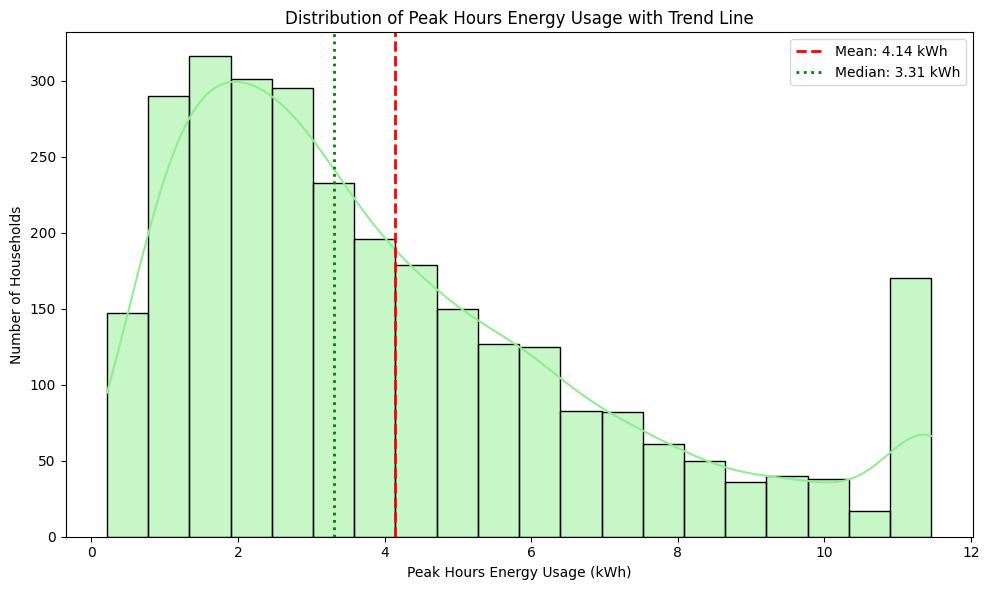

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram with KDE (trend line)
sns.histplot(df['Peak_Hours_Usage_kWh'], bins=20, kde=True, color='lightgreen', edgecolor='black')

# Mean and median lines
mean_val = df['Peak_Hours_Usage_kWh'].mean()
median_val = df['Peak_Hours_Usage_kWh'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f} kWh')
plt.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Median: {median_val:.2f} kWh')

# Labels and title
plt.xlabel('Peak Hours Energy Usage (kWh)')
plt.ylabel('Number of Households')
plt.title('Distribution of Peak Hours Energy Usage with Trend Line')
plt.legend()
plt.tight_layout()
plt.show()

,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Has_Fan
Energy_Consumption_kWh,1.00,0.68,0.03,0.01,0.97,0.01
Household_Size,0.68,1.00,0.01,0.03,0.67,-0.00
Avg_Temperature_C,0.03,0.01,1.00,-0.11,0.03,0.37
Has_AC,0.01,0.03,-0.11,1.00,0.02,-0.05
Peak_Hours_Usage_kWh,0.97,0.67,0.03,0.02,1.00,0.02
Has_Fan,0.01,-0.00,0.37,-0.05,0.02,1.00


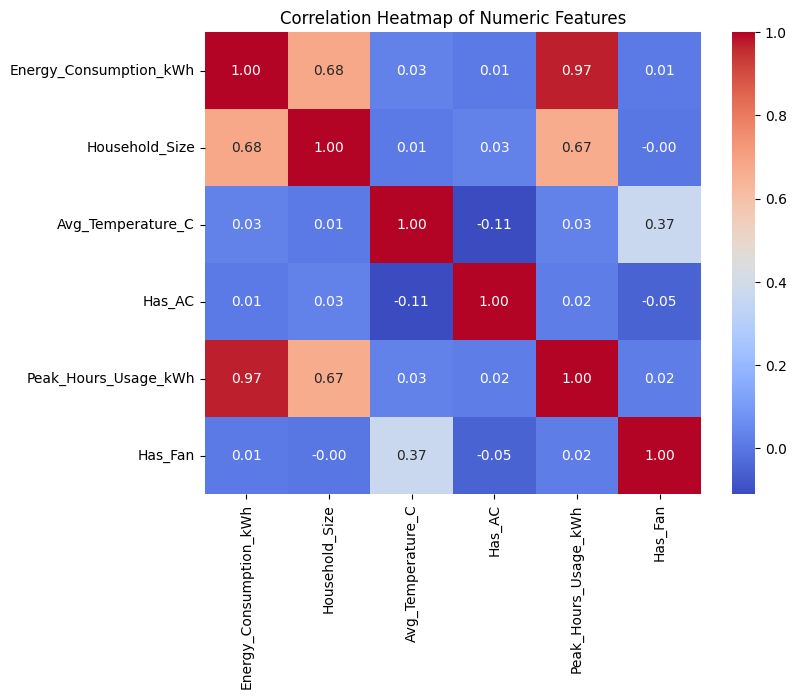

In [ ]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Only show correlation matrix and heatmap if there are at least four numeric columns
if numeric_df.shape[1] >= 4:
    # Compute the correlation matrix
    corr = numeric_df.corr().round(2)

    # Display as a formatted table
    from IPython.display import display  # Only needed for Jupyter
    display(corr)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')


<ipython-input-22-3563532541>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Location', columns='Temp_Bracket', values='Energy_Consumption_kWh', aggfunc='mean')


<Axes: xlabel='Temp_Bracket', ylabel='Location'>

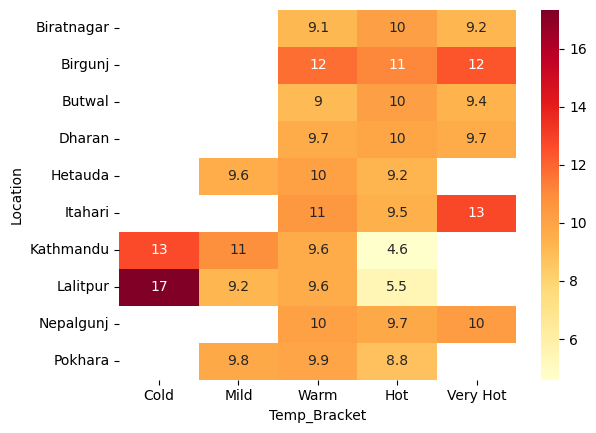

In [ ]:
df['Temp_Bracket'] = pd.cut(df['Avg_Temperature_C'], bins=[0,15,20,25,30,35], labels=['Cold','Mild','Warm','Hot','Very Hot'])
pivot = df.pivot_table(index='Location', columns='Temp_Bracket', values='Energy_Consumption_kWh', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlOrRd')


<Axes: xlabel='Avg_Temperature_C', ylabel='Energy_Consumption_kWh'>

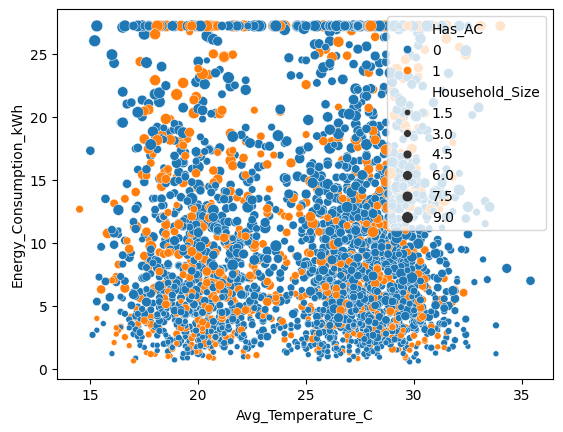

In [ ]:
sns.scatterplot(data=df, x='Avg_Temperature_C', y='Energy_Consumption_kWh', hue='Has_AC', size='Household_Size')


<Axes: xlabel='Location'>

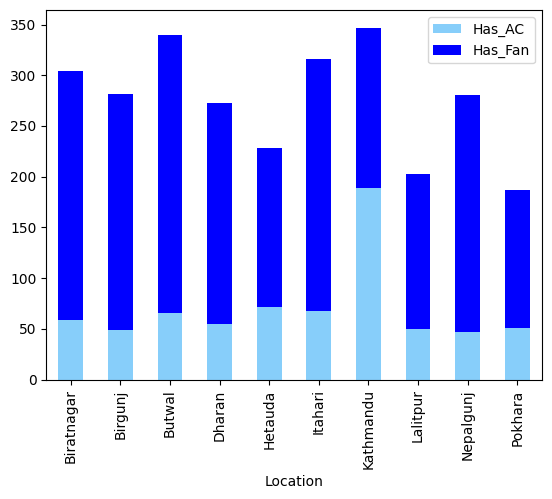

In [ ]:
ac_fan_counts = df.groupby('Location')[['Has_AC', 'Has_Fan']].sum()
ac_fan_counts.plot(kind='bar', stacked=True, color=['lightskyblue', 'blue'])




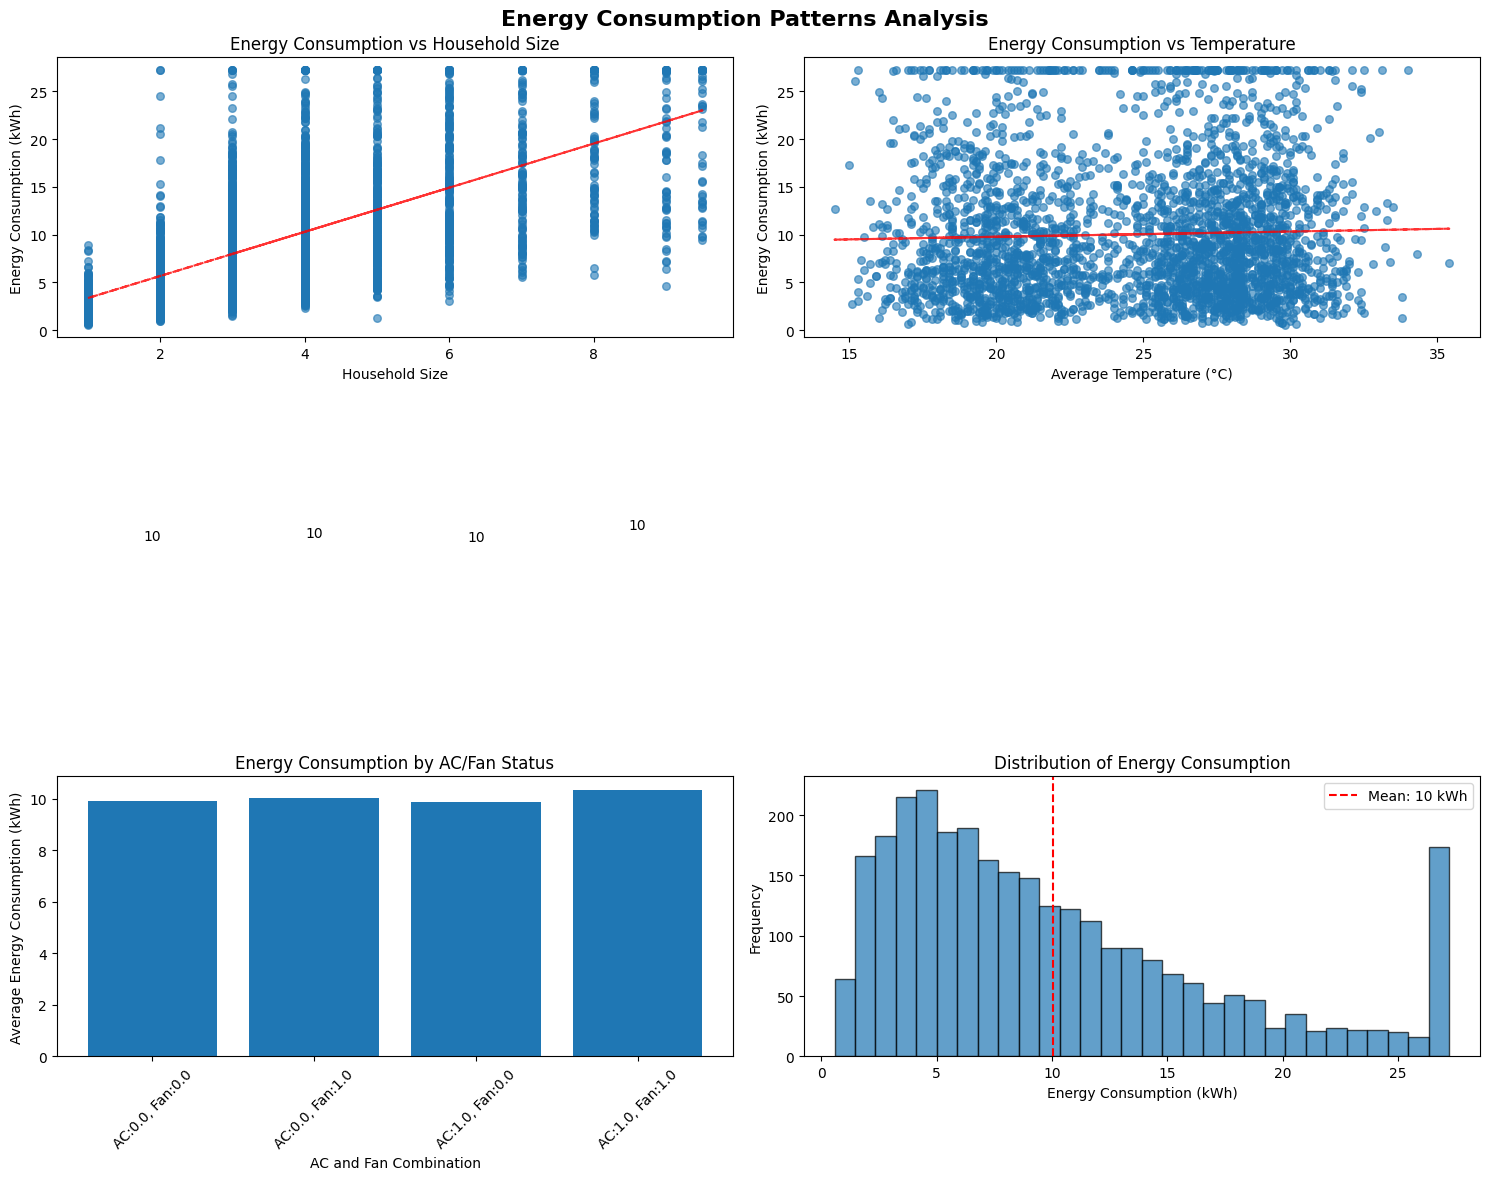

In [ ]:
# =============================================================================
# 1. ENERGY CONSUMPTION PATTERNS
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Energy Consumption Patterns Analysis', fontsize=16, fontweight='bold')

# 1.1 Energy vs Household Size
axes[0,0].scatter(df['Household_Size'], df['Energy_Consumption_kWh'], alpha=0.6, s=30)
axes[0,0].set_xlabel('Household Size')
axes[0,0].set_ylabel('Energy Consumption (kWh)')
axes[0,0].set_title('Energy Consumption vs Household Size')
# Add trend line
z = np.polyfit(df['Household_Size'], df['Energy_Consumption_kWh'], 1)
p = np.poly1d(z)
axes[0,0].plot(df['Household_Size'], p(df['Household_Size']), "r--", alpha=0.8)

# 1.2 Energy vs Temperature
axes[0,1].scatter(df['Avg_Temperature_C'], df['Energy_Consumption_kWh'], alpha=0.6, s=30)
axes[0,1].set_xlabel('Average Temperature (°C)')
axes[0,1].set_ylabel('Energy Consumption (kWh)')
axes[0,1].set_title('Energy Consumption vs Temperature')
# Add trend line
z = np.polyfit(df['Avg_Temperature_C'], df['Energy_Consumption_kWh'], 1)
p = np.poly1d(z)
axes[0,1].plot(df['Avg_Temperature_C'], p(df['Avg_Temperature_C']), "r--", alpha=0.8)

# 1.3 Energy consumption by AC/Fan combinations
ac_fan_groups = df.groupby(['Has_AC', 'Has_Fan'])['Energy_Consumption_kWh'].mean().reset_index()
ac_fan_groups['Group'] = ac_fan_groups.apply(lambda x: f"AC:{x['Has_AC']}, Fan:{x['Has_Fan']}", axis=1)
bars = axes[1,0].bar(ac_fan_groups['Group'], ac_fan_groups['Energy_Consumption_kWh'])
axes[1,0].set_xlabel('AC and Fan Combination')
axes[1,0].set_ylabel('Average Energy Consumption (kWh)')
axes[1,0].set_title('Energy Consumption by AC/Fan Status')
axes[1,0].tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar, value in zip(bars, ac_fan_groups['Energy_Consumption_kWh']):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                   f'{value:.0f}', ha='center', va='bottom')

# 1.4 Distribution of energy consumption
axes[1,1].hist(df['Energy_Consumption_kWh'], bins=30, alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Energy Consumption (kWh)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Energy Consumption')
axes[1,1].axvline(df['Energy_Consumption_kWh'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df["Energy_Consumption_kWh"].mean():.0f} kWh')
axes[1,1].legend()

plt.tight_layout()
plt.show()

<ipython-input-26-2715145861>:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


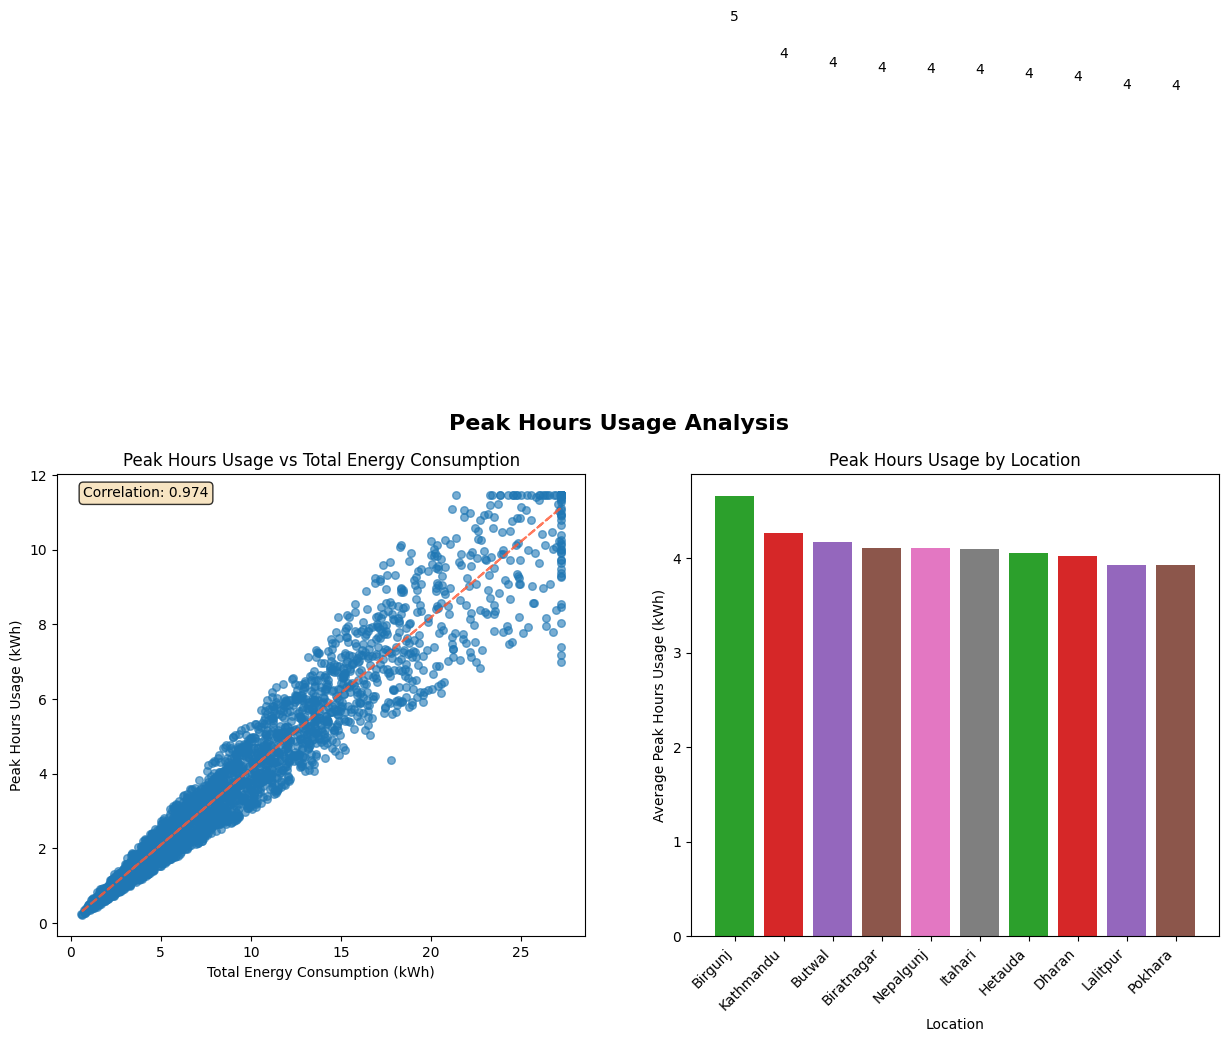

In [ ]:
# Custom color settings
scatter_color = '#1f77b4'  # A custom blue
trendline_color = '#ff5733'  # Orange-red for trendline
bar_colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']  # Add more as needed

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Peak Hours Usage Analysis', fontsize=16, fontweight='bold')

# 2.1 Peak Hours vs Total Energy (scatter plot)
axes[0].scatter(df['Energy_Consumption_kWh'], df['Peak_Hours_Usage_kWh'],
                alpha=0.6, s=30, c=scatter_color)
axes[0].set_xlabel('Total Energy Consumption (kWh)')
axes[0].set_ylabel('Peak Hours Usage (kWh)')
axes[0].set_title('Peak Hours Usage vs Total Energy Consumption')
# Add trend line
z = np.polyfit(df['Energy_Consumption_kWh'], df['Peak_Hours_Usage_kWh'], 1)
p = np.poly1d(z)
axes[0].plot(df['Energy_Consumption_kWh'], p(df['Energy_Consumption_kWh']),
             linestyle="--", color=trendline_color, alpha=0.8)
# Calculate and display correlation
corr = df['Energy_Consumption_kWh'].corr(df['Peak_Hours_Usage_kWh'])
axes[0].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0].transAxes,
             bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# 2.2 Peak Hours Usage by Location
peak_by_location = df.groupby('Location')['Peak_Hours_Usage_kWh'].mean().sort_values(ascending=False)
# Cycle through colors if there are more locations than colors
bars = axes[1].bar(range(len(peak_by_location)), peak_by_location.values,
                   color=bar_colors[:len(peak_by_location)])
axes[1].set_xticks(range(len(peak_by_location)))
axes[1].set_xticklabels(peak_by_location.index, rotation=45, ha='right')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Average Peak Hours Usage (kWh)')
axes[1].set_title('Peak Hours Usage by Location')
# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, peak_by_location.values)):
    axes[1].text(i, value + 5, f'{value:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

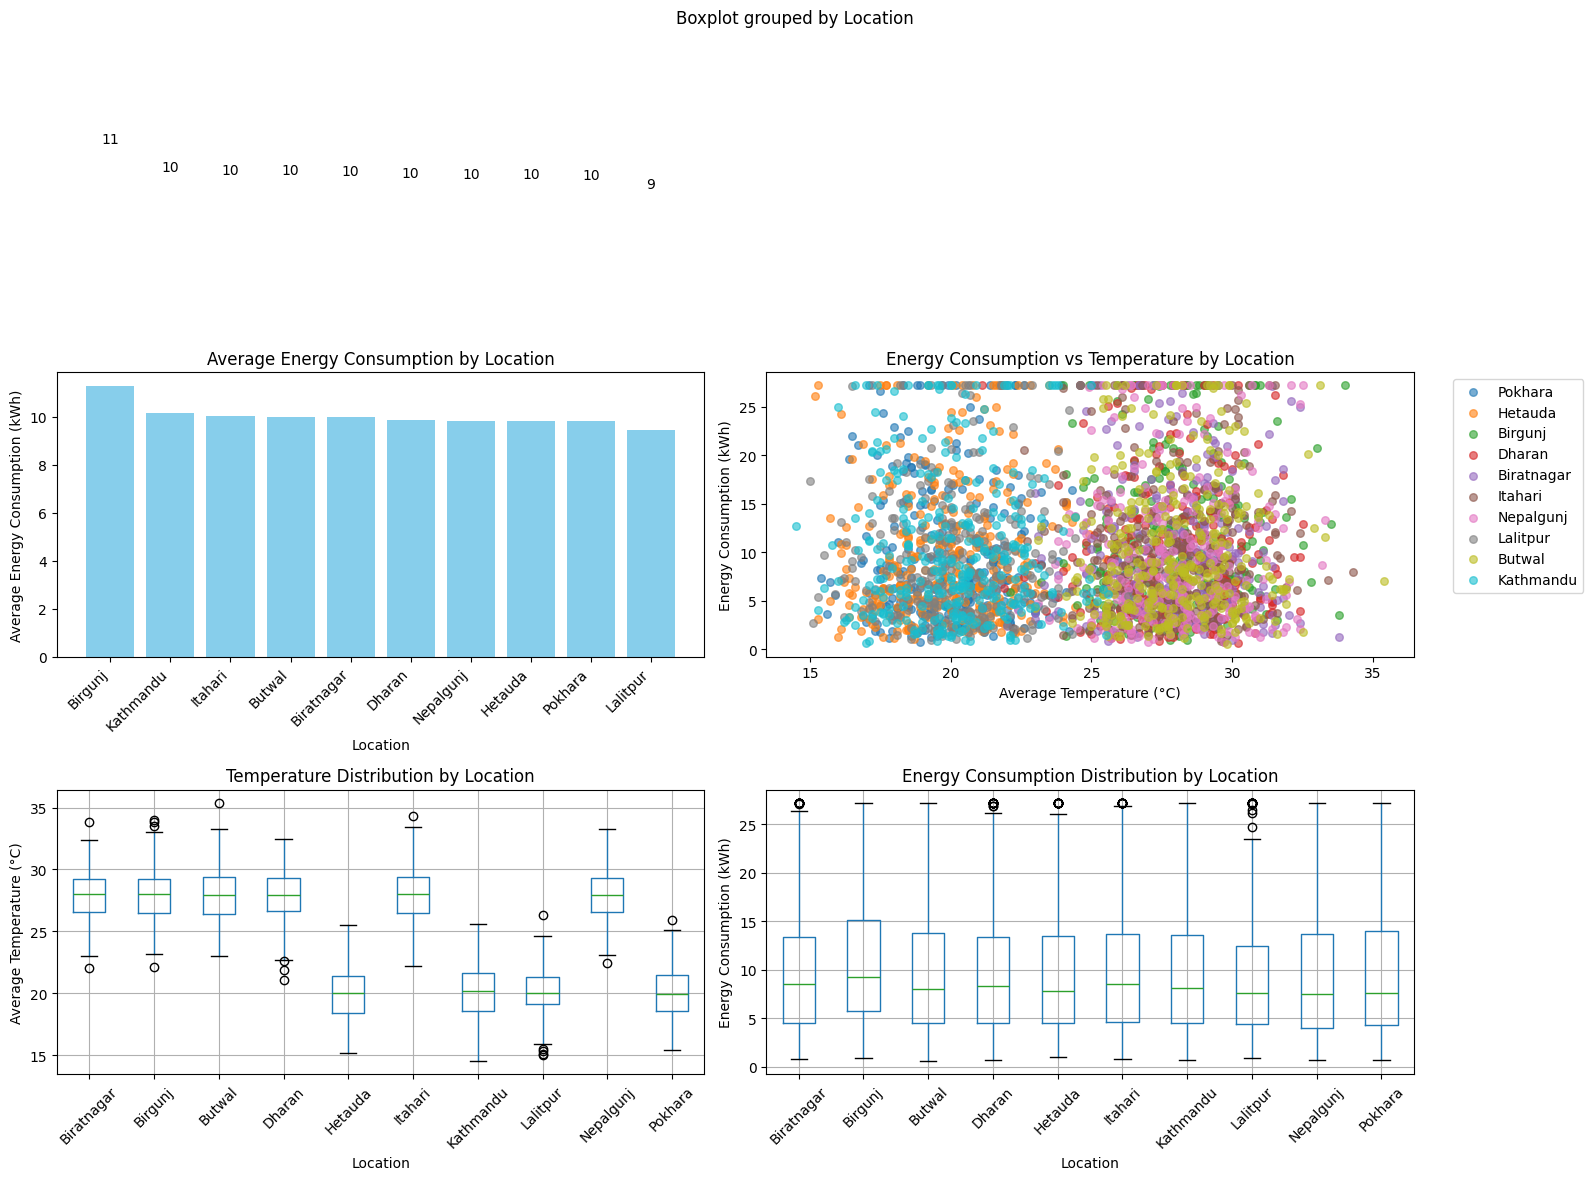

In [ ]:
# =============================================================================
# 3. LOCATION-BASED INSIGHTS
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Location-Based Energy Consumption Insights', fontsize=16, fontweight='bold')

# 3.1 Average Energy Consumption per Location
energy_by_location = df.groupby('Location')['Energy_Consumption_kWh'].mean().sort_values(ascending=False)
bars = axes[0,0].bar(range(len(energy_by_location)), energy_by_location.values, color='skyblue')
axes[0,0].set_xticks(range(len(energy_by_location)))
axes[0,0].set_xticklabels(energy_by_location.index, rotation=45, ha='right')
axes[0,0].set_xlabel('Location')
axes[0,0].set_ylabel('Average Energy Consumption (kWh)')
axes[0,0].set_title('Average Energy Consumption by Location')
# Add value labels
for i, (bar, value) in enumerate(zip(bars, energy_by_location.values)):
    axes[0,0].text(i, value + 10, f'{value:.0f}', ha='center', va='bottom')

# 3.2 Energy vs Temperature by Location (colored scatter)
locations_unique = df['Location'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(locations_unique)))
for i, location in enumerate(locations_unique):
    location_data = df[df['Location'] == location]
    axes[0,1].scatter(location_data['Avg_Temperature_C'], location_data['Energy_Consumption_kWh'],
                     alpha=0.6, s=30, label=location, color=colors[i])
axes[0,1].set_xlabel('Average Temperature (°C)')
axes[0,1].set_ylabel('Energy Consumption (kWh)')
axes[0,1].set_title('Energy Consumption vs Temperature by Location')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3.3 Temperature distribution by location
df.boxplot(column='Avg_Temperature_C', by='Location', ax=axes[1,0])
axes[1,0].set_xlabel('Location')
axes[1,0].set_ylabel('Average Temperature (°C)')
axes[1,0].set_title('Temperature Distribution by Location')
axes[1,0].tick_params(axis='x', rotation=45)

# 3.4 Energy consumption distribution by location
df.boxplot(column='Energy_Consumption_kWh', by='Location', ax=axes[1,1])
axes[1,1].set_xlabel('Location')
axes[1,1].set_ylabel('Energy Consumption (kWh)')
axes[1,1].set_title('Energy Consumption Distribution by Location')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

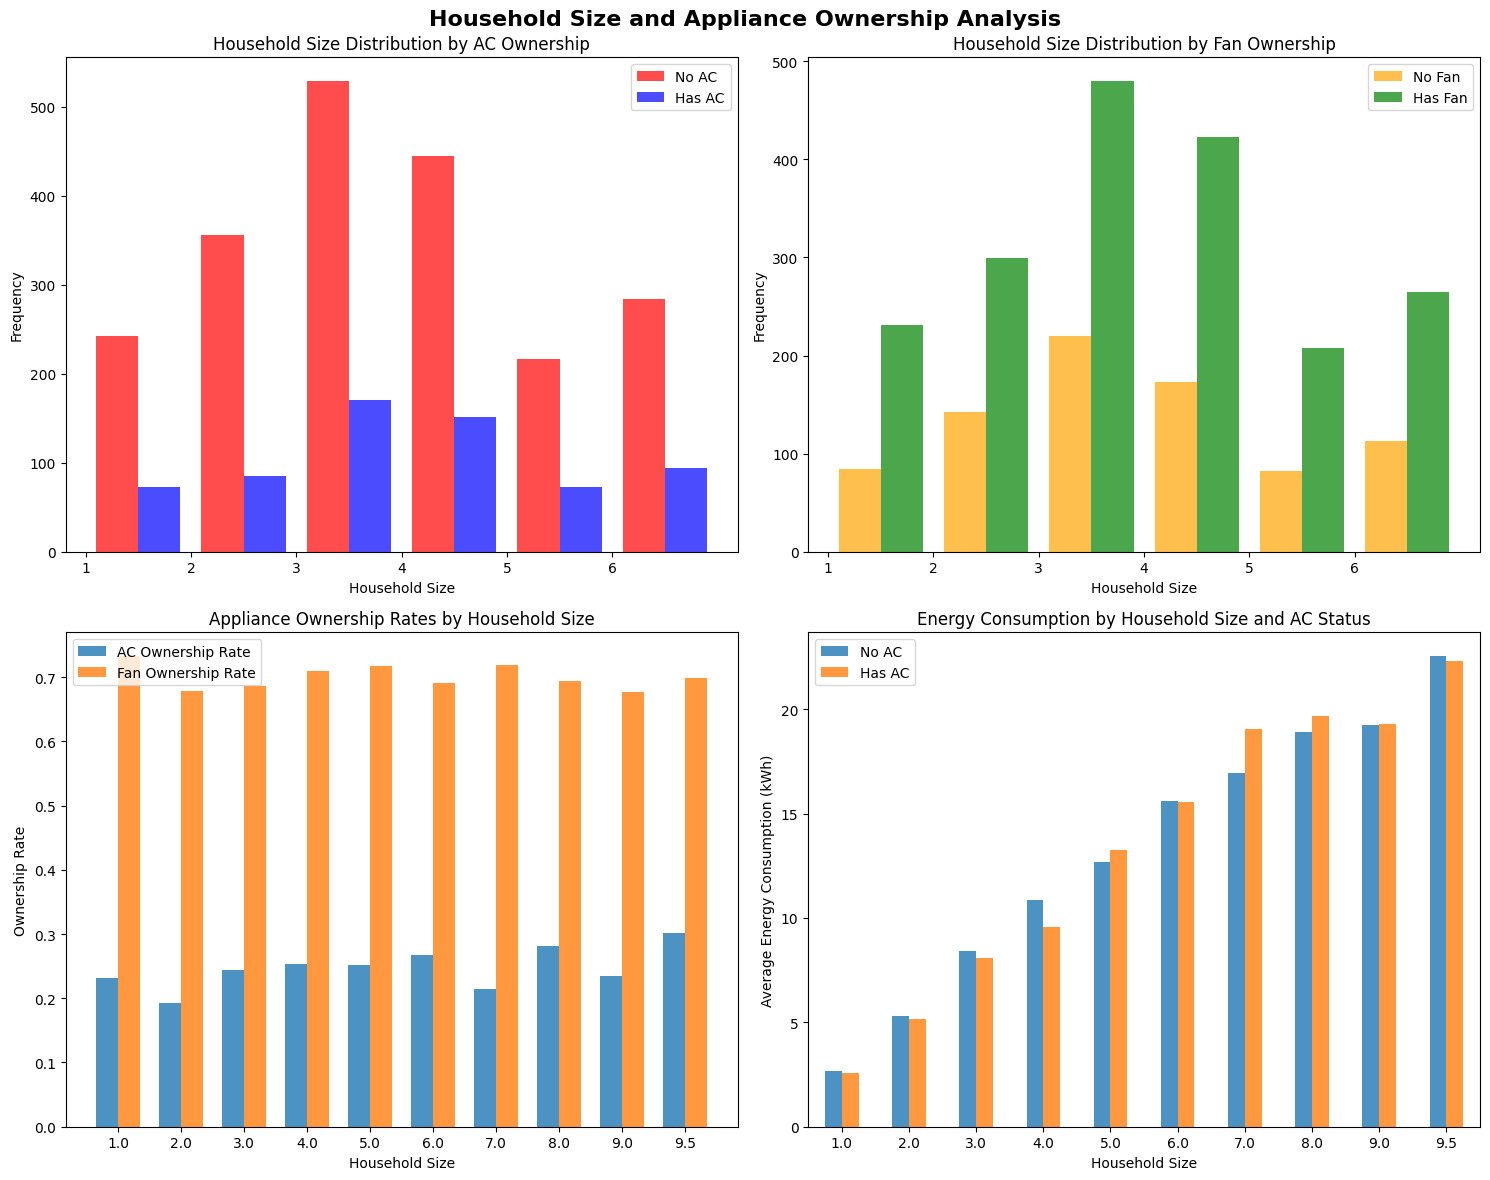

In [ ]:
# =============================================================================
# 5. HOUSEHOLD SIZE AND APPLIANCE OWNERSHIP
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Household Size and Appliance Ownership Analysis', fontsize=16, fontweight='bold')

# 5.1 Household Size distribution by AC ownership
ac_groups = [df[df['Has_AC'] == 0]['Household_Size'], df[df['Has_AC'] == 1]['Household_Size']]
axes[0,0].hist(ac_groups, bins=range(1, 8), alpha=0.7, label=['No AC', 'Has AC'], color=['red', 'blue'])
axes[0,0].set_xlabel('Household Size')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Household Size Distribution by AC Ownership')
axes[0,0].legend()
axes[0,0].set_xticks(range(1, 7))

# 5.2 Household Size distribution by Fan ownership
fan_groups = [df[df['Has_Fan'] == 0]['Household_Size'], df[df['Has_Fan'] == 1]['Household_Size']]
axes[0,1].hist(fan_groups, bins=range(1, 8), alpha=0.7, label=['No Fan', 'Has Fan'], color=['orange', 'green'])
axes[0,1].set_xlabel('Household Size')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Household Size Distribution by Fan Ownership')
axes[0,1].legend()
axes[0,1].set_xticks(range(1, 7))

# 5.3 Appliance ownership rates by household size
size_appliance = df.groupby('Household_Size').agg({
    'Has_AC': 'mean',
    'Has_Fan': 'mean'
}).round(3)

x = range(len(size_appliance))
width = 0.35
axes[1,0].bar([i - width/2 for i in x], size_appliance['Has_AC'], width, label='AC Ownership Rate', alpha=0.8)
axes[1,0].bar([i + width/2 for i in x], size_appliance['Has_Fan'], width, label='Fan Ownership Rate', alpha=0.8)
axes[1,0].set_xlabel('Household Size')
axes[1,0].set_ylabel('Ownership Rate')
axes[1,0].set_title('Appliance Ownership Rates by Household Size')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(size_appliance.index)
axes[1,0].legend()

# 5.4 Average energy consumption by household size and AC status
energy_by_size_ac = df.groupby(['Household_Size', 'Has_AC'])['Energy_Consumption_kWh'].mean().unstack()
energy_by_size_ac.plot(kind='bar', ax=axes[1,1], alpha=0.8)
axes[1,1].set_xlabel('Household Size')
axes[1,1].set_ylabel('Average Energy Consumption (kWh)')
axes[1,1].set_title('Energy Consumption by Household Size and AC Status')
axes[1,1].legend(['No AC', 'Has AC'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<ipython-input-29-2715536159>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_appliance = df.groupby('Temp_Bin').agg({


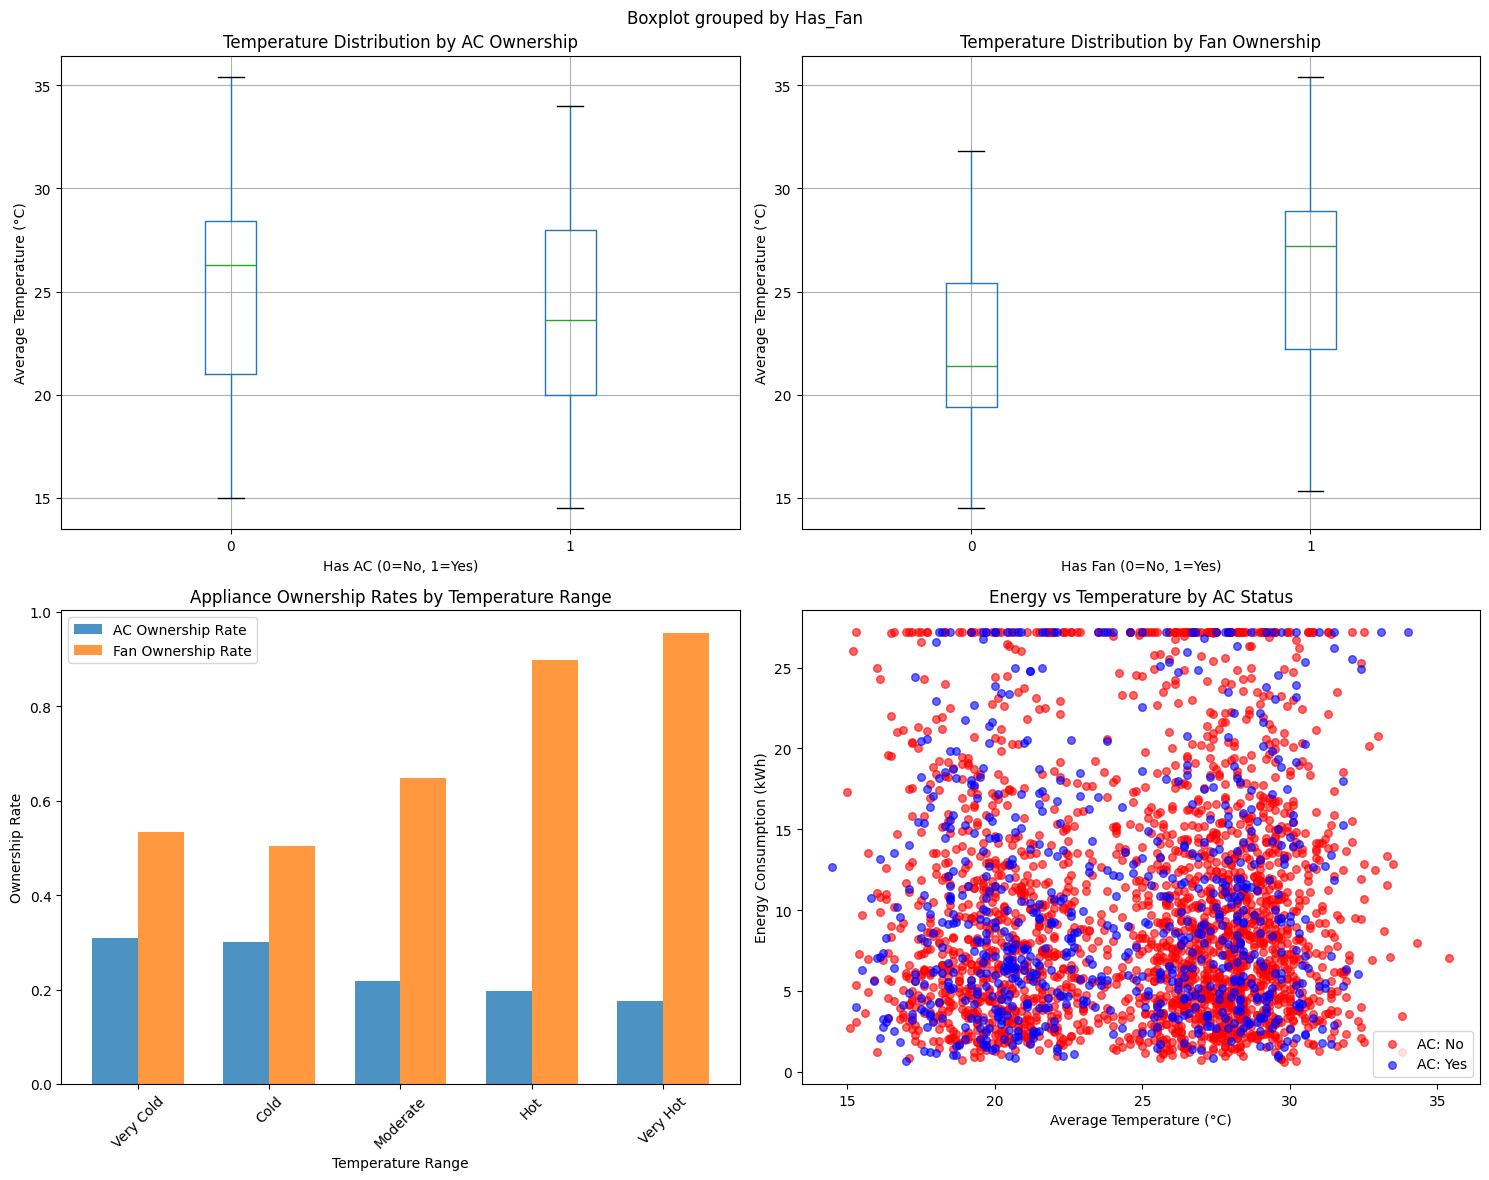

In [ ]:
# =============================================================================
# 6. TEMPERATURE AND APPLIANCE OWNERSHIP
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Temperature and Appliance Ownership Analysis', fontsize=16, fontweight='bold')

# 6.1 Temperature distribution by AC ownership
df.boxplot(column='Avg_Temperature_C', by='Has_AC', ax=axes[0,0])
axes[0,0].set_xlabel('Has AC (0=No, 1=Yes)')
axes[0,0].set_ylabel('Average Temperature (°C)')
axes[0,0].set_title('Temperature Distribution by AC Ownership')

# 6.2 Temperature distribution by Fan ownership
df.boxplot(column='Avg_Temperature_C', by='Has_Fan', ax=axes[0,1])
axes[0,1].set_xlabel('Has Fan (0=No, 1=Yes)')
axes[0,1].set_ylabel('Average Temperature (°C)')
axes[0,1].set_title('Temperature Distribution by Fan Ownership')

# 6.3 Appliance ownership rates by temperature bins
df['Temp_Bin'] = pd.cut(df['Avg_Temperature_C'], bins=5, labels=['Very Cold', 'Cold', 'Moderate', 'Hot', 'Very Hot'])
temp_appliance = df.groupby('Temp_Bin').agg({
    'Has_AC': 'mean',
    'Has_Fan': 'mean'
}).round(3)

x = range(len(temp_appliance))
width = 0.35
axes[1,0].bar([i - width/2 for i in x], temp_appliance['Has_AC'], width, label='AC Ownership Rate', alpha=0.8)
axes[1,0].bar([i + width/2 for i in x], temp_appliance['Has_Fan'], width, label='Fan Ownership Rate', alpha=0.8)
axes[1,0].set_xlabel('Temperature Range')
axes[1,0].set_ylabel('Ownership Rate')
axes[1,0].set_title('Appliance Ownership Rates by Temperature Range')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(temp_appliance.index, rotation=45)
axes[1,0].legend()

# 6.4 Energy consumption vs temperature, colored by AC status
ac_colors = {0: 'red', 1: 'blue'}
for ac_status in [0, 1]:
    data = df[df['Has_AC'] == ac_status]
    axes[1,1].scatter(data['Avg_Temperature_C'], data['Energy_Consumption_kWh'],
                     alpha=0.6, s=30, color=ac_colors[ac_status],
                     label=f'AC: {"Yes" if ac_status else "No"}')
axes[1,1].set_xlabel('Average Temperature (°C)')
axes[1,1].set_ylabel('Energy Consumption (kWh)')
axes[1,1].set_title('Energy vs Temperature by AC Status')
axes[1,1].legend()

plt.tight_layout()
plt.show()
